### Importing necessary libraries

In [1]:
import matplotlib.pyplot as plt
from SALib.analyze import morris
from SALib.sample.morris import sample
import pickle
import os

### Define the model input parameter ranges (this is a placeholder, adjust according to your input space)


In [2]:
problem = {
    'num_vars': 23,  # Number of input variables
    'names': ['Fund_Freq1', 'Fund_Freq2',
              'PGA_of_the_recording_scale_1', 'PGA_of_the_recording_scale_2',
              'b_Height',
              'dim_x',
              'dim_y',
              'b_st', 'h_st',
              'b_gr', 'h_gr',
              'E', 'MstY',
              'MstX', 'Mgr',
              'Lshape', 'bay2',
              'no_span_2', 'no_bay_2',
              'no_story_2', 'T1',
              'T2', 'T3'],
    'bounds': [
        # Example bounds for Fund_Freq1 (adjust these based on your data)
        [0.3937, 3.79414],
        [0.413223, 3.773585],  # Fund_Freq2
        [0.717,	10.83264],  # PGA_of_the_recording_scale_1
        [0.717,	11.87221],  # PGA_of_the_recording_scale_2
        [12, 52],  # b_Height
        [6, 35],  # dim_x
        [6, 35],  # dim_y
        [0.35,	1.4],  # b_st
        [0.35,	1.4],  # h_st
        [0.25,	0.35],  # b_gr
        [0.2,	0.65],  # h_gr
        [13000000,	20000000],  # E (Young's Modulus, for example)
        [630,	2800],  # MstY
        [535.5,	3220],  # MstX
        [30.1,	509],     # Mgr
        [0, 1],        # Lshape
        [5, 6],        # bay2
        [1, 4],        # no_span_2
        [1, 5],        # no_bay_2
        [2, 11],       # no_story_2
        [0.32878,	2.5397],    # T1
        [0.304787,	2.3298],    # T2
        [0.21399,	1.7943]     # T3
    ]
}

# Generate samples
# Adjust N (number of samples) and num_levels
param_values = sample(problem, N=1000, num_levels=4)

### Load your pre-trained model and scaler

In [3]:
models_fp = "Models"
model_file_name = "Optimised Gradient boosting_v2.pkl"
scaler_file_name = "Optimised Gradient boosting_scaler_v2.pkl"
model_file_path = os.path.join(models_fp, model_file_name)
scaler_file_path = os.path.join(models_fp, scaler_file_name)

with open(model_file_path, 'rb') as model_file:
    model = pickle.load(model_file)

with open(scaler_file_path, 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

d:\Proiecte_GitHUB\DIGITERRA_ScientificReports\.venv\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DummyRegressor from version 1.5.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\Proiecte_GitHUB\DIGITERRA_ScientificReports\.venv\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.5.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\Proiecte_GitHUB\DIGITERRA_ScientificReports\.venv\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estima

### Morris Sensitivity Analysis

d:\Proiecte_GitHUB\DIGITERRA_ScientificReports\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


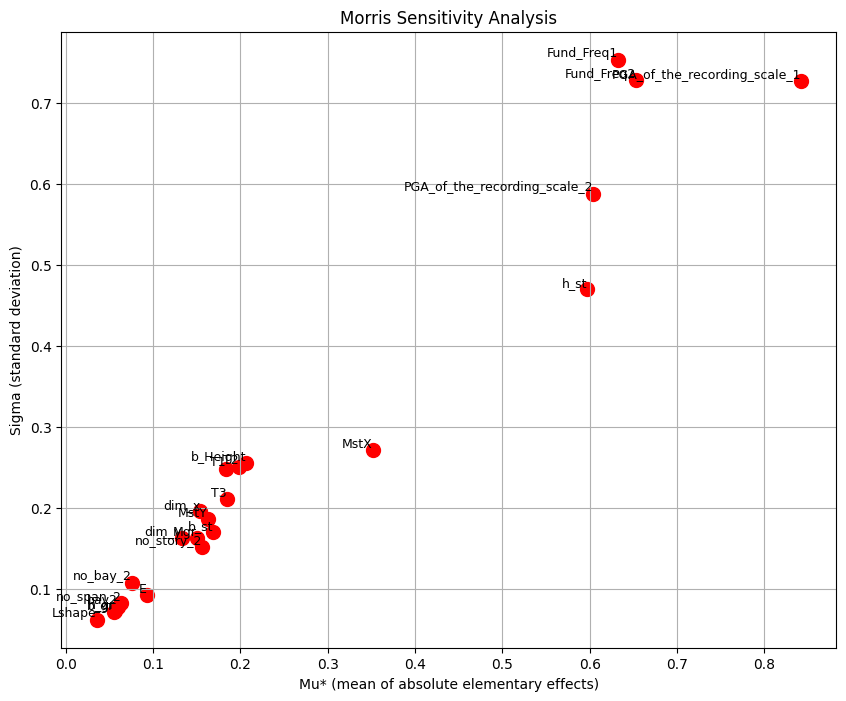

In [4]:
# Scale the generated samples
X_scaled = scaler.transform(param_values)

# Run model predictions on the sampled data
Y = model.predict(X_scaled)

# Perform Morris Sensitivity Analysis
Si = morris.analyze(problem, param_values, Y, 1000, num_levels=4)

# Plot the results and annotate the parameters
plt.figure(figsize=(10, 8))
plt.scatter(Si['mu_star'], Si['sigma'], c='r', s=100)

# Add annotations for each parameter
for i, param_name in enumerate(problem['names']):
    plt.text(Si['mu_star'][i], Si['sigma'][i], param_name, fontsize=9,
             verticalalignment='bottom', horizontalalignment='right')

# Add axis labels and title
plt.xlabel('Mu* (mean of absolute elementary effects)')
plt.ylabel('Sigma (standard deviation)')
plt.title('Morris Sensitivity Analysis')

# Add grid for better readability
plt.grid(True)

# Display the plot
plt.show()
